<a href="https://colab.research.google.com/github/jmbanda/CSC8980_NLP_Spring2021/blob/main/Class_04_Text_Classification_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class 04 - Text Classification II**

In this class we will go over code examples that use the clasic 20 newsgroups dataset (http://qwone.com/~jason/20Newsgroups/) that can be utilized via scikit-learn. 

In this notebook we will cover using scikit-learn to pre-process text (Bag of Words and TF-IDF) and classify text using Naive Bayes, Perceptron, Logistic Regresion, and Decision Trees.

There are some practice excercises at the end of this lesson that are HIGLY recommended to be done in order to get a better understanding of this code and the text classification part of this class.

**Disclaimer:** All the code provided in this and the other Colab notebooks provided during the class, is fair game to re-use for assignments, exams, and your project. 

The following lines of code setup our ploting environment using matplotlib and seaborn

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Multinomial Naive Bayes

In multinomial Naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates. The algorithm model the data distribuiton with a best-fit multinomial distribution.

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
In the following examples, we will use data from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a two of these categories, and download the training and testing set:

In [3]:
categories = ['rec.autos','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [8]:
print(train.data[6])

From: ssave@ole.cdac.com (The Devil Reincarnate)
Subject: Quick question
Keywords: Removing panels.
Organization: CDAC, WA
Lines: 9

 How do you take off the driver side door panel from the inside
on an '87 Honda Prelude?  The speaker went scratchy, and I want
to access its pins.

 I see only one press button and the rest is snug fit.


 -S
 ssave@ole.cdac.com



### Bag-of-words featurization

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the bag of words approach. This is called ``CountVectorizer`` in scikit-learn. Then we will create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(), MultinomialNB())

After we create the pipeline, we then train the model using the training data (``train.data``) and the target labels (``train.target``). After the model is trained, we will use it to predict the labels of the test data (``test.data``). 

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

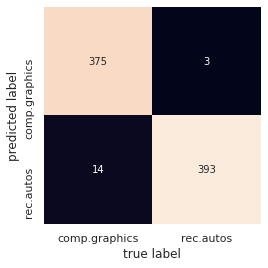

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

While the confusion matrix shows us the class based performance, we are now going to look at additional metrics to determine the actual performance of the algorithm. Remember that in the slides for this lecture we further discused what each of these mean. 

In [15]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.978343949044586
Precision: 0.9656019656019657
Recall: 0.9924242424242424
F1 Score: 0.9783325566933647
Mean Absolute Error: 0.02165605095541401
Mean Squared Error: 0.02165605095541401
Root Mean Squared Error: 0.1471599502426323


Evidently, even this very simple classifier can successfully separate graphics talk from car talk.

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [16]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category('tired of unix')

'comp.graphics'

In [18]:
predict_category('need new brakes')

'rec.autos'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

### TF-IDF featurization

Previously we used ``CountVectorizer`` or the Bag-of-words approach to convert each string into a vector of numbers.
Now we will use the TF-IDF (term frequency–inverse document frequency) vectorizer to create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())


After we create the pipeline, we then train the model using the training data (``train.data``) and the target labels (``train.target``). After the model is trained, we will use it to predict the labels of the test data (``test.data``). 

In [20]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

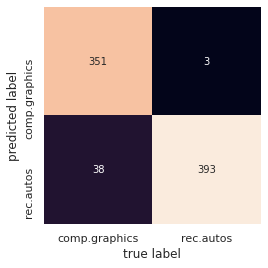

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

While the confusion matrix shows us the class based performance, we are now going to look at additional metrics to determine the actual performance of the algorithm. Remember that in the slides for this lecture we further discused what each of these mean. 

In [23]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.9477707006369427
Precision: 0.9118329466357309
Recall: 0.9924242424242424
F1 Score: 0.9476207603086282
Mean Absolute Error: 0.05222929936305733
Mean Squared Error: 0.05222929936305733
Root Mean Squared Error: 0.22853730409510245


## **Perceptron**

As a different option to Naive Bayes, the Perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

### Bag-of-words featurization

Here we will start using a bag-of-words featurization and the Perceptron classifier via a pipeline. We will ommit some of the same details that are discussed in the previous section as the code is the same. 

In [24]:
from sklearn.linear_model import Perceptron
model = make_pipeline(CountVectorizer(), Perceptron())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.

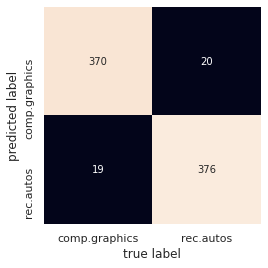

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.9503184713375796
Precision: 0.9518987341772152
Recall: 0.9494949494949495
F1 Score: 0.9503155687621816
Mean Absolute Error: 0.049681528662420385
Mean Squared Error: 0.049681528662420385
Root Mean Squared Error: 0.22289353660979133


### TF-IDF featurization
Previously we used ``CountVectorizer`` or the Bag-of-words approach to convert each string into a vector of numbers.
Now we will use the TF-IDF (term frequency–inverse document frequency) vectorizer to create a pipeline that attaches it to a multinomial perceptron classifier:

In [27]:
from sklearn.linear_model import Perceptron
model = make_pipeline(TfidfVectorizer(), Perceptron())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.

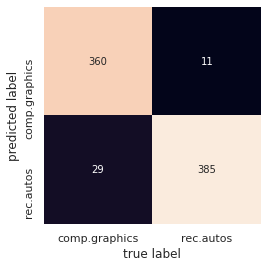

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.9490445859872612
Precision: 0.9299516908212561
Recall: 0.9722222222222222
F1 Score: 0.9489928525016245
Mean Absolute Error: 0.050955414012738856
Mean Squared Error: 0.050955414012738856
Root Mean Squared Error: 0.22573305919324013


## **Logistic Regression**

Logistic regression is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. 

### Bag-of-words featurization

Here we will start using a bag-of-words featurization and the Logistic Regression classifier via a pipeline. We will ommit some of the same details that are discussed in the previous section as the code is the same. 

In [30]:
from sklearn.linear_model import LogisticRegression
model = make_pipeline(CountVectorizer(), LogisticRegression())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.

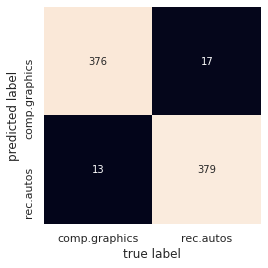

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.9617834394904459
Precision: 0.9668367346938775
Recall: 0.9570707070707071
F1 Score: 0.9617828813273268
Mean Absolute Error: 0.03821656050955414
Mean Squared Error: 0.03821656050955414
Root Mean Squared Error: 0.19549056373532236


### TF-IDF featurization
Previously we used ``CountVectorizer`` or the Bag-of-words approach to convert each string into a vector of numbers.
Now we will use the TF-IDF (term frequency–inverse document frequency) vectorizer to create a pipeline that attaches it to a multinomial perceptron classifier:

In [34]:
from sklearn.linear_model import LogisticRegression
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.

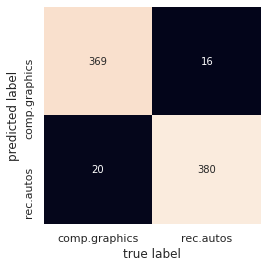

In [35]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.954140127388535
Precision: 0.95
Recall: 0.9595959595959596
F1 Score: 0.9541311207198785
Mean Absolute Error: 0.045859872611464965
Mean Squared Error: 0.045859872611464965
Root Mean Squared Error: 0.2141491830744749


## Bonus: Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualised.

* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

* Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Here we will start using a bag-of-words featurization and the Decision Tree classifier via a pipeline. We will ommit some of the same details that are discussed in the previous section as the code is the same. 

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = make_pipeline(CountVectorizer(), DecisionTreeClassifier())
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.

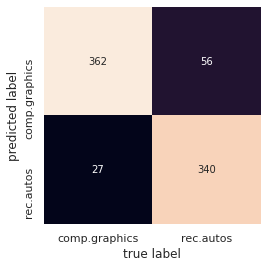

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [40]:
print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))


Accuracy: 0.8942675159235669
Precision: 0.9264305177111717
Recall: 0.8585858585858586
F1 Score: 0.8941844054561903
Mean Absolute Error: 0.10573248407643313
Mean Squared Error: 0.10573248407643313
Root Mean Squared Error: 0.32516531807133603


# Recommended Excercises

1) So far we have only classified two classes, try classifiying 3 or more classes with the same code (some classifers might need some adjustments). 

2) We have tried 3 classification algorithms, try more like SVM, Random Forests. 

3) The 20 news groups data comes already split in a training and a testing set. Practice splitting the data using ``train_test_split``. 

4) We have evaluated 3 algorithms using 2 different featurization schemes, leading to a total of 6 algorithms to evaluate. Practice comparing their performance metrics side by side. 